<a href="https://colab.research.google.com/github/prathamsss/MountainCar_Control_Using_Gestures/blob/master/Handgesture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob


''' 
Utility for files handling and support function
''' 
class DirHandler(object):
    '''
    A Utility to create a structure as :
                            Train:  Class1
                                    Class2...
                            Test:   Class1
                                    Class2...
                            ...
    path  : Path Where you want to create above structure
    '''
    def __init__(self,path):
        self.path = path

    def make_directory(self, directory):
            if not os.path.exists(directory):
                os.makedirs(directory)
                print(directory, ": Directory has been Created")
                return directory
            else:
                print("Directory Already exists")
                return directory

    def createset(self,mode):
        directory = self.make_directory(os.path.join(self.path, mode))
        gestures = ['zero','one','two']
        for i in gestures:
            self.make_directory(os.path.join(directory, i))
        print("Required Directories Created!")

    def datacount(self,mode):
        datastats = {}
        for files in os.listdir(os.path.join(self.path,mode)):
            try:
                k = (len(os.listdir(os.path.join(self.path,mode,files))))
                datastats[files] = k
            except NotADirectoryError:
                pass
        return {mode:datastats}

    def removeunwanted(self):
        for root,dir,files in  os.walk(os.path.join(self.path)):
            for f in (files):
                if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg'):
                    pass
                else:
                    os.remove(os.path.join(root,f))



main_dir_path ="/content/drive/MyDrive/Gesture Recognition/NewSet/FinalSet"
D = DirHandler(main_dir_path)
# D.createset(mode='train')
# D.createset(mode='test')
# D.createset(mode='validation')


print(D.datacount('test'))
print(D.datacount('train'))

D.removeunwanted()

{'test': {'2': 376, '1': 376, '0': 376}}
{'train': {'0': 1126, '1': 1126, '2': 1126}}


In [ ]:
!pip install tf-keras-vis tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


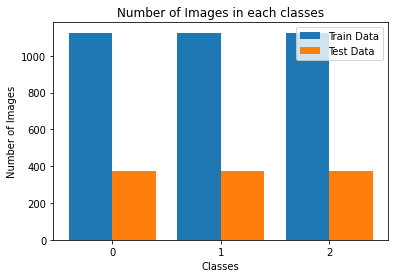

In [ ]:
import cv2
import numpy as np
import os
# from Utils import DirHandler
import matplotlib.pyplot as plt

import os
import glob

class DirHandler(object):
    '''
    A Utility to create a structure as :
                            Train:  Class1
                                    Class2...
                            Test:   Class1
                                    Class2...
                            ...
    path  : Path Where you want to create above structure
    '''
    def __init__(self,path):
        self.path = path

    def make_directory(self, directory):
            if not os.path.exists(directory):
                os.makedirs(directory)
                print(directory, ": Directory has been Created")
                return directory
            else:
                print("Directory Already exists")
                return directory

    def createset(self,mode):
        directory = self.make_directory(os.path.join(self.path, mode))
        gestures = ['zero','one','two']
        for i in gestures:
            self.make_directory(os.path.join(directory, i))
        print("Required Directories Created!")

    def datacount(self,mode):
        datastats = {}
        for files in os.listdir(os.path.join(self.path,mode)):
            try:
                k = (len(os.listdir(os.path.join(self.path,mode,files))))
                datastats[files] = k
            except NotADirectoryError:
                pass
        return {mode:datastats}

    def removeunwanted(self):
        for root,dir,files in  os.walk(os.path.join(self.path)):
            for f in (files):
                if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg'):
                    pass
                else:
                    os.remove(os.path.join(root,f))


# D = DirHandler("/Users/prathameshsardeshmukh/PycharmProjects/Motor_AI_Test/Dataset")
# D.createset(mode='dataset')
# D.createset(mode='test')
# D.createset(mode='validation')


# print(D.datacount('dataset'))
# D.removeunwanted()

def Data_stats(path):

    D = DirHandler(path)
    train_data = (D.datacount(mode='train'))
    train_stats = (list(list(train_data.values())[0].values()))
    test_data = (D.datacount(mode='test'))
    test_stats = (list(list(test_data.values())[0].values()))

    X = list(list(train_data.values())[0].keys())
    X_axis = np.arange(len(list(train_data.values())[0]))
    plt.bar(X_axis - 0.2, train_stats, 0.4, label = 'Train Data')
    plt.bar(X_axis + 0.2, test_stats, 0.4, label = 'Test Data')

    plt.xticks(X_axis, X)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Number of Images in each classes")
    plt.legend()
    plt.show()

Data_stats(main_dir_path)

Found 3375 images belonging to 3 classes.
Found 1125 images belonging to 3 classes.
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


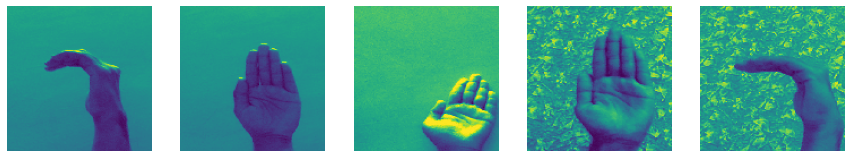

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
import albumentations as A


main_dir_path ="/content/drive/MyDrive/Gesture Recognition/NewSet/FinalSet"
train_dir_path = os.path.join(main_dir_path,'train')
test_dir_path = os.path.join(main_dir_path,'test')

img_size = (128,128)
batch_size = 32



def train_transform(image):
    aug = A.Compose([
        
        A.Rotate(limit=30,p=0.2),
        #  A.RandomBrightness(limit=0.9, always_apply=True, p=0.1),
        A.Blur(always_apply=False, p=0.4),
    
    ])
    return aug(image=image)['image']


train_datagen = ImageDataGenerator(
        rescale=1./255,
        # preprocessing_function=train_transform,
        horizontal_flip=False,
        shear_range=0.2,
        zoom_range=0.2
     
        )
test_datagen = ImageDataGenerator(
        rescale=1./255
        )

training_set = train_datagen.flow_from_directory(train_dir_path,
                                                 batch_size=batch_size,
                                                 target_size= img_size,
                                                 color_mode='grayscale',
                                                 class_mode='categorical'
                                                 )

validation_set = test_datagen.flow_from_directory(test_dir_path,
                                                  batch_size=batch_size,
                                                  target_size= img_size,
                                                  color_mode='grayscale',
                                                  class_mode='categorical'
                                                  ) 

def visualisation(sets):
  
  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
  for i in range(5):
    image = next(sets)[0]
    image= (np.squeeze(image[0]))
    ax[i].imshow(image)
    ax[i].axis('off')

visualisation(validation_set) 

In [ ]:
num_traning_sample = training_set.samples
num_validation_sample = validation_set.samples

training_set.class_indices , num_traning_sample, num_validation_sample


({'0': 0, '1': 1, '2': 2}, 3375, 1125)

In [ ]:
from tensorflow.keras import regularizers
from keras.layers import Convolution2D as Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.layers import BatchNormalization



classifier = Sequential()

classifier.add(Convolution2D(64, (5, 5), input_shape=(128, 128, 1),padding="same", activation='relu'))
classifier.add(Convolution2D(64, (5, 5), padding="same",activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

classifier.add(Convolution2D(128, (5, 5), activation='relu'))
classifier.add(Convolution2D(128, (5, 5), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

classifier.add(Convolution2D(512, (5, 5), activation='relu',kernel_regularizer=regularizers.l2(0.0002)))
classifier.add(Convolution2D(512, (5, 5), activation='relu',kernel_regularizer=regularizers.l2(0.0002)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))


classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))

classifier.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.003)))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.003)))

classifier.add(Dense(units=3, activation='softmax'))
print(classifier.summary())




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 128, 128, 64)      1664      
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 64)      102464    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 128)       204928    
                                                                 
 conv2d_25 (Conv2D)          (None, 56, 56, 128)       409728    
                                                                 
 batch_normalization_5 (Batc  (None, 56, 56, 128)      512       
 hNormalization)                                      

In [ ]:
from keras.optimizers import adam_v2
import tensorflow as tf

epoch = 10
lr = 0.001
model_name = "Final_model"
out_dir = "/content/outputs"


optimizer = adam_v2.Adam(learning_rate=lr)
classifier.compile(optimizer= optimizer , loss='categorical_crossentropy', metrics=['accuracy']) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


bestmodel_path = os.path.join(out_dir, "best"+model_name+".hdf5")
history_path = os.path.join(out_dir,model_name+".log")

checkpoint = ModelCheckpoint(filepath=bestmodel_path, verbose=1, save_best_only=True)
csv_logger = CSVLogger(history_path)

In [ ]:
num_train_samples = num_traning_sample
num_test_samples = num_validation_sample

history = classifier.fit(
    training_set,
    steps_per_epoch = num_train_samples//batch_size,
    epochs =epoch,
    validation_data = validation_set,
    validation_steps = num_test_samples//batch_size,
     verbose=1,
     callbacks=[csv_logger, checkpoint])

classifier.save(os.path.join(out_dir, model_name+".hdf5"))


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 4.5048 - accuracy: 0.5684
Epoch 00001: val_loss improved from inf to 5.01636, saving model to /content/outputs/Final_model.hdf5
105/105 [==============================] - 27s 235ms/step - loss: 4.5048 - accuracy: 0.5684 - val_loss: 5.0164 - val_accuracy: 0.4196
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 2.4626 - accuracy: 0.6602
Epoch 00002: val_loss improved from 5.01636 to 2.01739, saving model to /content/outputs/Final_model.hdf5
105/105 [==============================] - 24s 229ms/step - loss: 2.4626 - accuracy: 0.6602 - val_loss: 2.0174 - val_accuracy: 0.5661
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 1.5011 - accuracy: 0.7571
Epoch 00003: val_loss improved from 2.01739 to 1.44771, saving model to /content/outputs/Final_model.hdf5
105/105 [==============================] - 24s 228ms/step - loss: 1.5011 - accuracy: 0.7571 - val_loss: 1.4477 - val_accuracy: 0.7

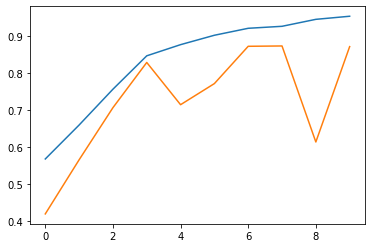

In [ ]:
from matplotlib.pyplot import plot

classifier.history.epoch
classifier.history.history['accuracy']
classifier.history.history['loss']
plot(classifier.history.history['accuracy'])

plot(classifier.history.history['val_accuracy'])

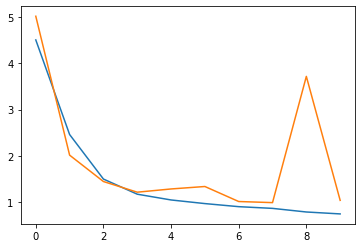

In [ ]:
 plot(classifier.history.history['loss'])
 plot(classifier.history.history['val_loss'])

In [ ]:
# Loading the model
from keras.models import model_from_json
import cv2
import tensorflow as tf


img_path = "/content/3A.jpg"

ms=tf.keras.models.load_model(os.path.join(out_dir,model_name+".hdf5"), compile=True)
test_image = cv2.imread(img_path)
test_image.shape


(400, 300, 3)

In [ ]:
import operator
from google.colab.patches import cv2_imshow


def predict(model_path,img_path):
  model=tf.keras.models.load_model(model_path, compile=True)
  test_image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  test_image = cv2.resize(test_image,(128,128))
  print(test_image.shape)
  # test = post_pro_func(img_path)
  (cv2_imshow(test_image))
  print(test_image.shape)
  result = model.predict(test_image.reshape(1, 128, 128,1))
  print(result)
  index = np.argmax(result)
  l=list( training_set.class_indices)
  pred_value = l[index]
  print(pred_value)
  
  return pred_value

model_path = os.path.join(out_dir,model_name+".hdf5")
predict(model_path,img_path)

In [ ]:
from sklearn import metrics
import numpy as np

ms=tf.keras.models.load_model("/content/outputs/Final_model.hdf5", compile=True)
predictions = ms.predict_generator(validation_set)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


In [ ]:

predicted_classes = np.argmax(predictions, axis=1)
print(len(predicted_classes))

true_classes = validation_set.classes
class_labels = list(training_set.class_indices.keys())   

print(len(class_labels))
print(len(true_classes))
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
confusion_matrix

1125
3
1125
              precision    recall  f1-score   support

           0       0.34      0.36      0.35       375
           1       0.35      0.39      0.37       375
           2       0.30      0.24      0.27       375

    accuracy                           0.33      1125
   macro avg       0.33      0.33      0.33      1125
weighted avg       0.33      0.33      0.33      1125



array([[134, 137, 104],
       [123, 148, 104],
       [143, 142,  90]])

In [ ]:
confusion_matrix.diagonal()

array([97, 57, 35])